In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnigns
import warnings
warnings.filterwarnings(action='ignore')

# Format the notebook
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [ ]:
# Importing dataset
data = pd.read_csv('/content/drive/MyDrive/Data_Set_Practice/Ecommerce_Delivery_Analytics_New.csv')
# Data Dimension
rows, columns = data.shape
print(f'Dataset has {rows} rows and {columns} columns.')


Dataset has 100000 rows and 12 columns.


In [ ]:
# data columns
data.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Order Date & Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested', 'Unnamed: 11'],
      dtype='object')

In [ ]:
#datatpes check
data.dtypes

,0
Order ID,object
Customer ID,object
Platform,object
Order Date & Time,object
Delivery Time (Minutes),int64
Product Category,object
Order Value (INR),int64
Customer Feedback,object
Service Rating,int64
Delivery Delay,object


In [ ]:
# Data sample

data.head()


,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested,Unnamed: 11
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No,NaN
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No,NaN
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes,NaN
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes,NaN
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No,NaN


In [ ]:
# Removing unnamed columns using drop function
data.drop(data.columns[data.columns.str.contains('^Unnamed')], axis=1, inplace=True)

In [ ]:

'''
Explanation:

data.columns.str.contains('^Unnamed'): Creates a boolean Series indicating which column names start with "Unnamed".

~: Inverts the boolean Series, so columns not starting with "Unnamed" are marked as True.

data.loc[:, ...]: Selects all rows (:) and only the columns where the condition is True.
GeeksforGeeks

This effectively filters out any columns with names like "Unnamed: 0", which are typically artifacts from CSV files where the index was saved without a header
'''

data = data.loc[:, ~data.columns.str.contains('^Unnamed')]


In [ ]:
# Data sample

data.head()


,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [ ]:
# Data Dimension
rows, columns = data.shape
print(f'Dataset has {rows} rows and {columns} columns.')

Dataset has 100000 rows and 11 columns.


In [ ]:
#identify missing data in a DataFrame
data.isnull().sum()

,0
Order ID,0
Customer ID,0
Platform,0
Order Date & Time,0
Delivery Time (Minutes),0
Product Category,0
Order Value (INR),0
Customer Feedback,0
Service Rating,0
Delivery Delay,0


In [ ]:
duplicate_customers = data[data.duplicated(subset='Customer ID', keep=False)]
duplicate_customers.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [ ]:
# way to find all rows in our DataFrame (data) that have duplicate Customer IDs, including every occurrence, not just the subsequent ones.
duplicate_customers[['Customer ID']].value_counts().head()

,count
Customer ID,
CUST8779,26
CUST1848,25
CUST8289,24
CUST3001,23
CUST2633,23


In [ ]:
new_data =data.drop_duplicates(subset='Customer ID', keep='first')
new_data.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [ ]:
dropped_count = len(data) - len(new_data)
dropped_count

91000

In [ ]:
# Looping to find the number of categorical and numerical features
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
num ,cat=0,0
for cols in new_data.columns:
  if new_data.dtypes[cols] =='O':
      cat=cat+1
  else:
    num=num+1

print(f'The data has {num} numerical features and {cat} categorical features')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The data has 3 numerical features and 8 categorical features


In [ ]:
#Analysisng the target column
new_data['Platform'].value_counts(normalize=True)*100

,proportion
Platform,
Blinkit,34.000000
JioMart,33.088889
Swiggy Instamart,32.911111


In [ ]:
new_data.nunique()

,0
Order ID,9000
Customer ID,9000
Platform,3
Order Date & Time,60
Delivery Time (Minutes),60
Product Category,6
Order Value (INR),1634
Customer Feedback,13
Service Rating,5
Delivery Delay,2


In [ ]:
new_data.describe()

,Delivery Time (Minutes),Order Value (INR),Service Rating
count,9000.000000,9000.000000,9000.000000
mean,29.545000,591.874222,3.237889
std,10.034244,418.214454,1.572053
min,5.000000,50.000000,1.000000
25%,23.000000,282.000000,2.000000
50%,30.000000,479.000000,3.000000
75%,36.000000,774.000000,5.000000
max,65.000000,2000.000000,5.000000


In [ ]:
# duplicate check
drows, dcols = new_data[new_data.duplicated()].shape
print('There is no duplicates in the data.' if drows == 0 else f'There are {drows} duplicates in the data.')

There is no duplicates in the data.


In [ ]:
# Missing values check

mv_grt30_lst = []   # list to store feature with more than 30% missing values
mv_lsr30_lst = []   # list to store feature with less than 30% missing values

for feature in new_data.columns:
    if (new_data[feature].isnull().mean()*100) > 30:
        mv_grt30_lst.append(feature)
    elif 0.0000 < (new_data[feature].isnull().mean()*100) <= 30:
        mv_lsr30_lst.append(feature)

print(f'There are {len(mv_grt30_lst)} features that has more than 30% missing values.')
print(f'There are {len(mv_lsr30_lst)} features that has less than 30% missing values.')

There are 0 features that has more than 30% missing values.
There are 0 features that has less than 30% missing values.


In [ ]:
#missing value check
new_data.isnull().sum()

,0
Order ID,0
Customer ID,0
Platform,0
Order Date & Time,0
Delivery Time (Minutes),0
Product Category,0
Order Value (INR),0
Customer Feedback,0
Service Rating,0
Delivery Delay,0


In [ ]:
# Data validation

# Dataframe for datatype
data_type = pd.DataFrame(new_data.dtypes, columns = ['Data_type'])

# Dataframe for missing percent
data_missing = pd.DataFrame(np.round(new_data.isnull().mean()*100,2),
                            columns = ['Missing_percent'])
# Dataframe for sampledata
sample_data = pd.DataFrame(new_data.head(2).T)

# Concatinating the above dataframe
data_concat = pd.concat([data_type, data_missing, sample_data], axis=1)

# Renaming the dataframe columns
data_concat.rename(columns = {0: 'Sample_1',
                              1: 'Sample_2'}, inplace = True)
data_concat

,Data_type,Missing_percent,Sample_1,Sample_2
Order ID,object,0.0,ORD000001,ORD000002
Customer ID,object,0.0,CUST2824,CUST1409
Platform,object,0.0,JioMart,Blinkit
Order Date & Time,object,0.0,19:29.5,54:29.5
Delivery Time (Minutes),int64,0.0,30,16
Product Category,object,0.0,Fruits & Vegetables,Dairy
Order Value (INR),int64,0.0,382,279
Customer Feedback,object,0.0,"Fast delivery, great service!",Quick and reliable!
Service Rating,int64,0.0,5,5
Delivery Delay,object,0.0,No,No


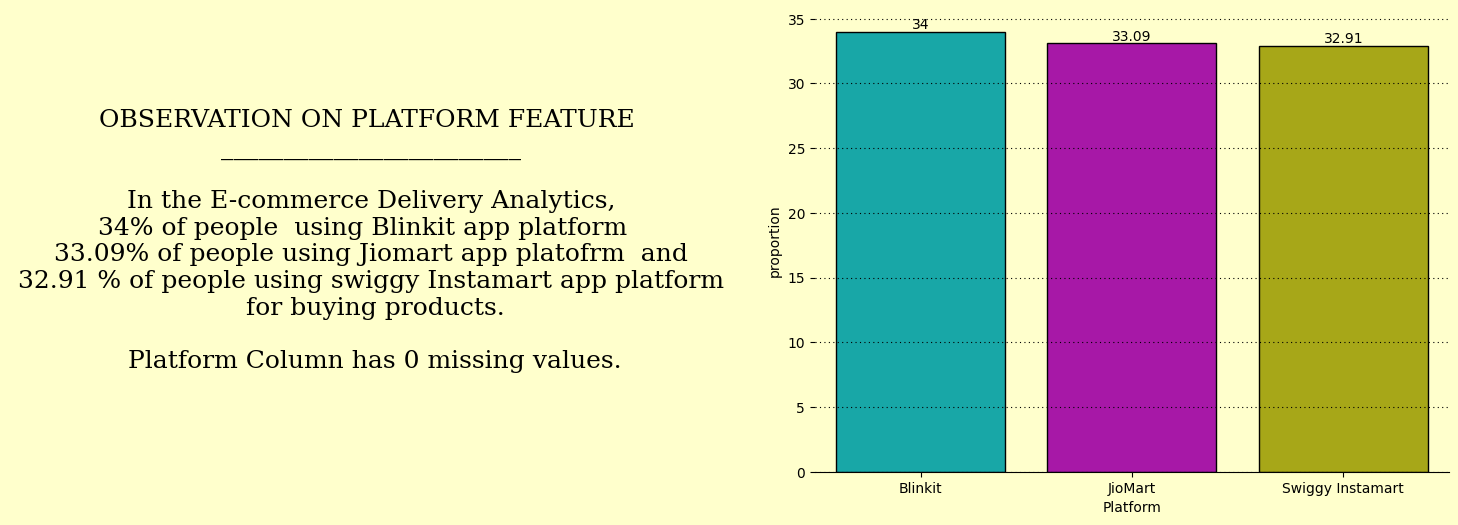

In [ ]:
# Analysing the platform column

# creating a plot structure
fig = plt.figure(figsize=(18, 6))
spec = fig.add_gridspec(1, 2)
sec_1 = fig.add_subplot(spec[0, 0])
sec_2 = fig.add_subplot(spec[0, 1])

# adding color preference
bg_color = '#ffffcc'
for area in [fig, sec_1, sec_2]:
    area.set_facecolor(bg_color)

# Plotting the graph
ax=round(new_data['Platform'].value_counts(normalize=True)*100,2)
ax1=sns.barplot(data=ax,palette=["c", "m", "y"],ec = "black")  # ec stands for edge color of a bar.

ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax1.bar_label(ax1.containers[2])

sec_2.grid(axis='y', color='black', ls=':', dashes=(1,3))
plt.xticks(rotation=0)

# number of missing values
m_vals = new_data['Platform'].isnull().sum()


# Narrating the observation
sec_1.text(0.5, 0.5, f'OBSERVATION ON PLATFORM FEATURE \n________________________\n\nIn the E-commerce Delivery Analytics,\n\
34% of people  using Blinkit app platform  \n 33.09% of people using Jiomart app platofrm  and \n 32.91 % of people using swiggy Instamart app platform \n for buying products.\n\n Platform Column has {m_vals} missing values.',
ha='center', va='center', size=18, fontfamily='serif')

# removing axis
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)

for position in ['left', 'right', 'top', 'bottom']:
    for selection in [sec_1, sec_2]:
        if position == 'bottom' and selection == sec_2:
            continue
        else:
            selection.spines[position].set_visible(False)


plt.show()

 **Univariate Analysis**

*   Understand the Distribution and box plot of each features















In [ ]:
# check unique values in key columns

print(new_data['Platform'].value_counts())

print(new_data['Product Category'].value_counts())

Platform
Blinkit             3060
JioMart             2978
Swiggy Instamart    2962
Name: count, dtype: int64
Product Category
Snacks                 1530
Grocery                1528
Dairy                  1513
Beverages              1507
Personal Care          1462
Fruits & Vegetables    1460
Name: count, dtype: int64


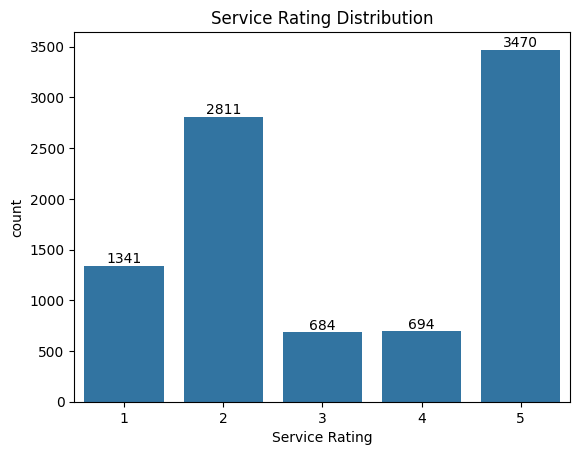

In [ ]:
ax=sns.countplot(x='Service Rating',data = new_data)
ax.bar_label(ax.containers[0])
ax.set_title('Service Rating Distribution')
plt.show()

Text(0, 0.5, 'Number of Orders')

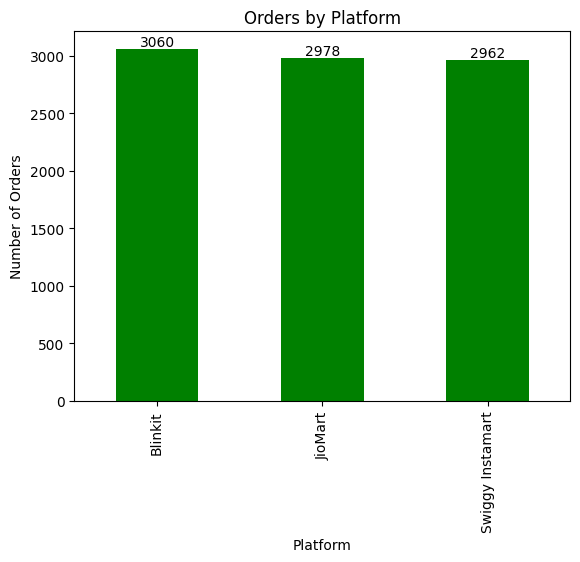

In [ ]:
# Plot for Platforms

ax=new_data['Platform'].value_counts().plot(kind='bar',color = "green")
ax.set_title('Orders by Platform')
ax.bar_label(ax.containers[0])
ax.set_ylabel('Number of Orders')

<class 'pandas.core.series.Series'>
<class 'matplotlib.container.BarContainer'>
<BarContainer object of 3 artists>


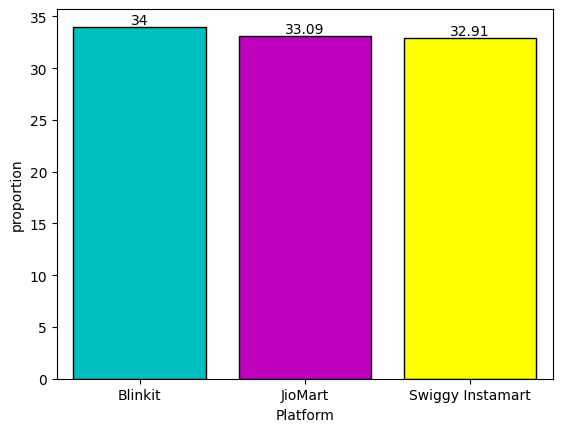

In [ ]:
ax=round(new_data['Platform'].value_counts(normalize=True)*100,2)
print(type(ax))
ax1=sns.barplot(data=ax,facecolor = ["c","m","yellow"],ec = "black")
print(type(ax1.containers[0]))
print(ax1.containers[0])
ax1.bar_label(ax1.containers[0])
plt.show()

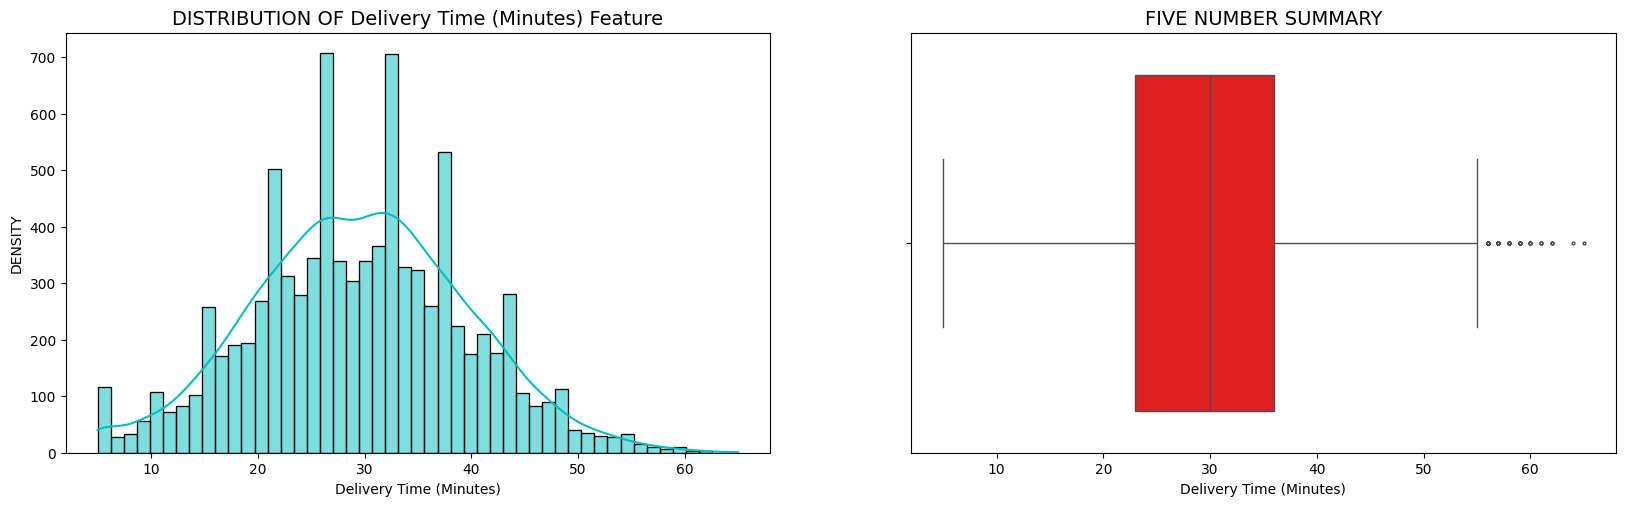

In [ ]:
# Analysing Delivery Time (Minutes) feature

# Distribution plot and outlier plot
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.histplot(new_data['Delivery Time (Minutes)'], color='c',kde=True)
viz.set_title('DISTRIBUTION OF Delivery Time (Minutes) Feature',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('Delivery Time (Minutes)',fontsize =10,color = 'black')

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(new_data['Delivery Time (Minutes)'], orient='h',color='red',fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY',fontsize=14,color='black')
viz.set_xlabel('Delivery Time (Minutes)',fontsize =10,color = 'black')
plt.show()

In [ ]:
# Numerical summary
print('Numerical Summary: ')
print('Mean:', new_data['Delivery Time (Minutes)'].mean())
print('Median:', new_data['Delivery Time (Minutes)'].quantile(0.5))
print('90% Data', new_data['Delivery Time (Minutes)'].quantile(0.9))
print('99% Data:', new_data['Delivery Time (Minutes)'].quantile(0.99))
print('100% Data:', new_data['Delivery Time (Minutes)'].quantile(1))

Numerical Summary: 
Mean: 29.545
Median: 30.0
90% Data 42.0
99% Data: 53.0
100% Data: 65.0


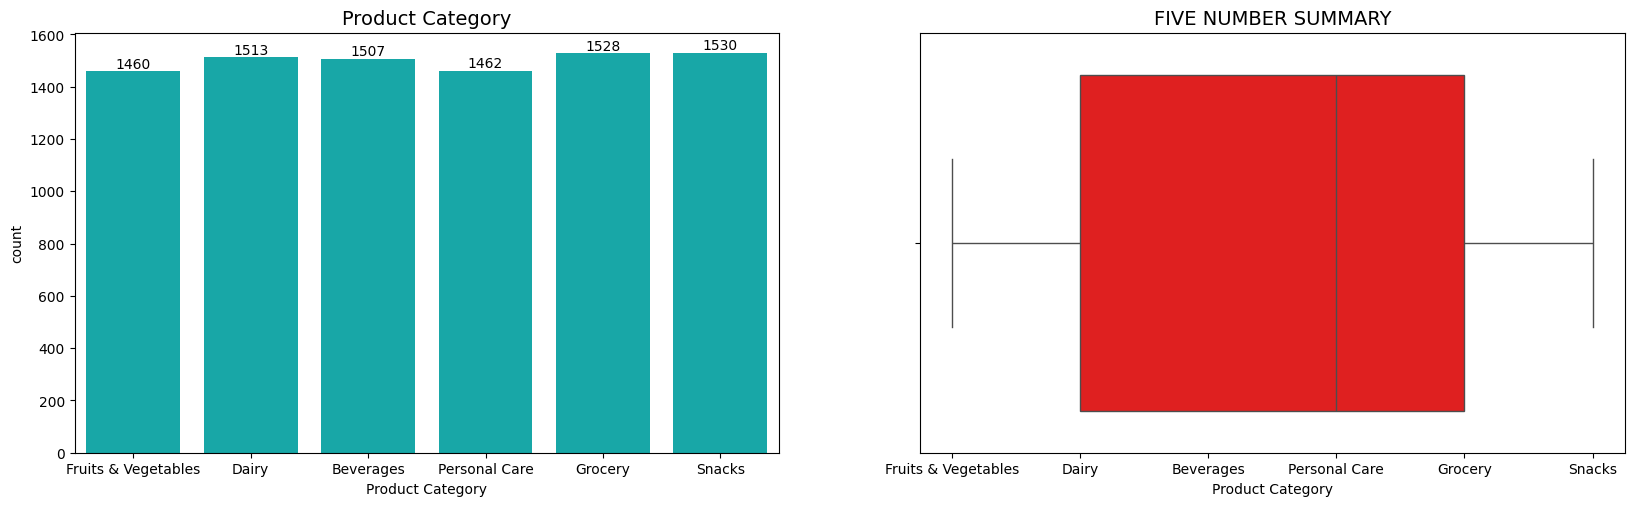

In [ ]:
# Analysing Product Category feature

# Distribution plot and outlier plot
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)

viz = sns.countplot(x='Product Category', data=new_data,color='c')
viz.set_title('Product Category',fontsize=14,color='black')
viz.bar_label(viz.containers[0])
viz.set_ylabel('count',fontsize =10,color = 'black')
viz.set_xlabel('Product Category',fontsize =10,color = 'black')

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(new_data['Product Category'], orient='h',color='red',fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY',fontsize=14,color='black')
viz.set_xlabel('Product Category',fontsize =10,color = 'black')
plt.show()

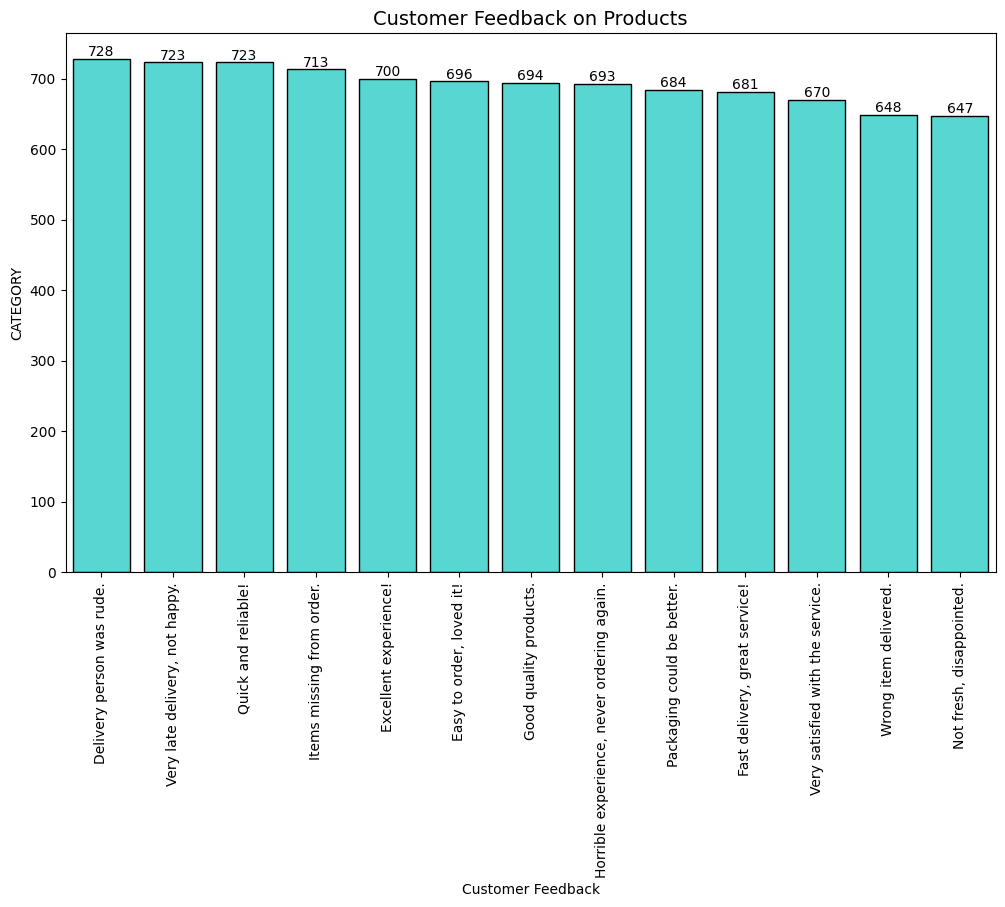

In [ ]:
# Countplot for Customer Feedback
plt.figure(figsize=(12,7))
viz = sns.countplot(x=new_data['Customer Feedback'],
                    order=new_data['Customer Feedback'].value_counts().index,
                    ec = "black",color='#43ebe6')
viz.set_title('Customer Feedback on Products',fontsize=14,color='black')
viz.set_ylabel('CATEGORY',fontsize =10,color = 'black')
viz.set_xlabel('Customer Feedback',fontsize =10,color = 'black')
viz.bar_label(viz.containers[0])
plt.xticks(rotation=90)
plt.show()

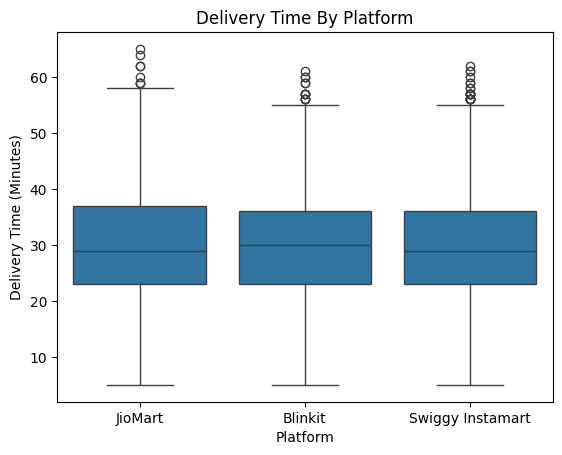

In [ ]:
# Delivery time by platform

sns.boxplot(x='Platform', y= 'Delivery Time (Minutes)', data=new_data)
plt.title('Delivery Time By Platform')
plt.show()

In [ ]:
new_data.head()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No


In [ ]:
# Order Value by Product Category

sns.barplot(x = 'Product Category', y = 'Order Value (INR)', data=df, estimator=sum)
plt.xticks(rotation=

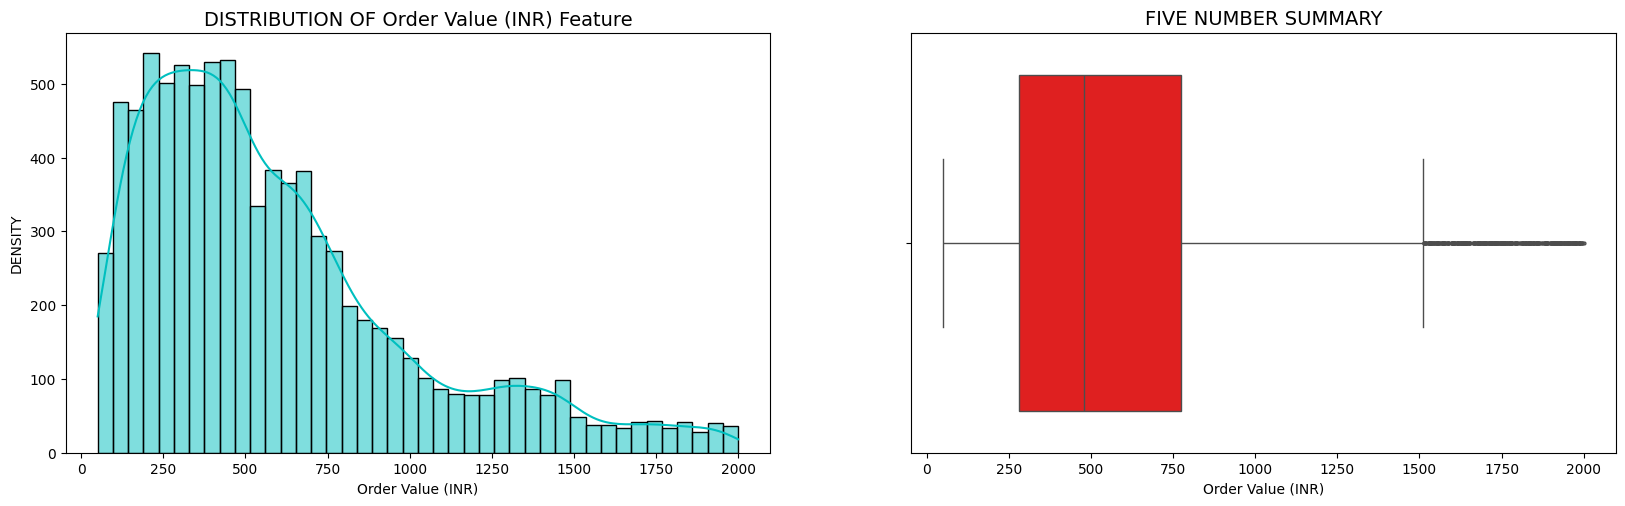

In [ ]:
# Analysing Order Value (INR)	 feature

# Distribution plot and outlier plot
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.histplot(new_data['Order Value (INR)'], color='c',kde=True)
viz.set_title('DISTRIBUTION OF Order Value (INR) Feature',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('Order Value (INR)',fontsize =10,color = 'black')

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(new_data['Order Value (INR)'], orient='h',color='red',fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY',fontsize=14,color='black')
viz.set_xlabel('Order Value (INR)',fontsize =10,color = 'black')
plt.show()

In [ ]:
# Five number summary
print(data['Order Value (INR)'].min())            # min
print(data['Order Value (INR)'].quantile(0.25))   # Q1
print(data['Order Value (INR)'].quantile(0.5))    # Q2
print(data['Order Value (INR)'].quantile(0.75))   # Q3
print(data['Order Value (INR)'].max())            # max

50
283.0
481.0
770.0
2000


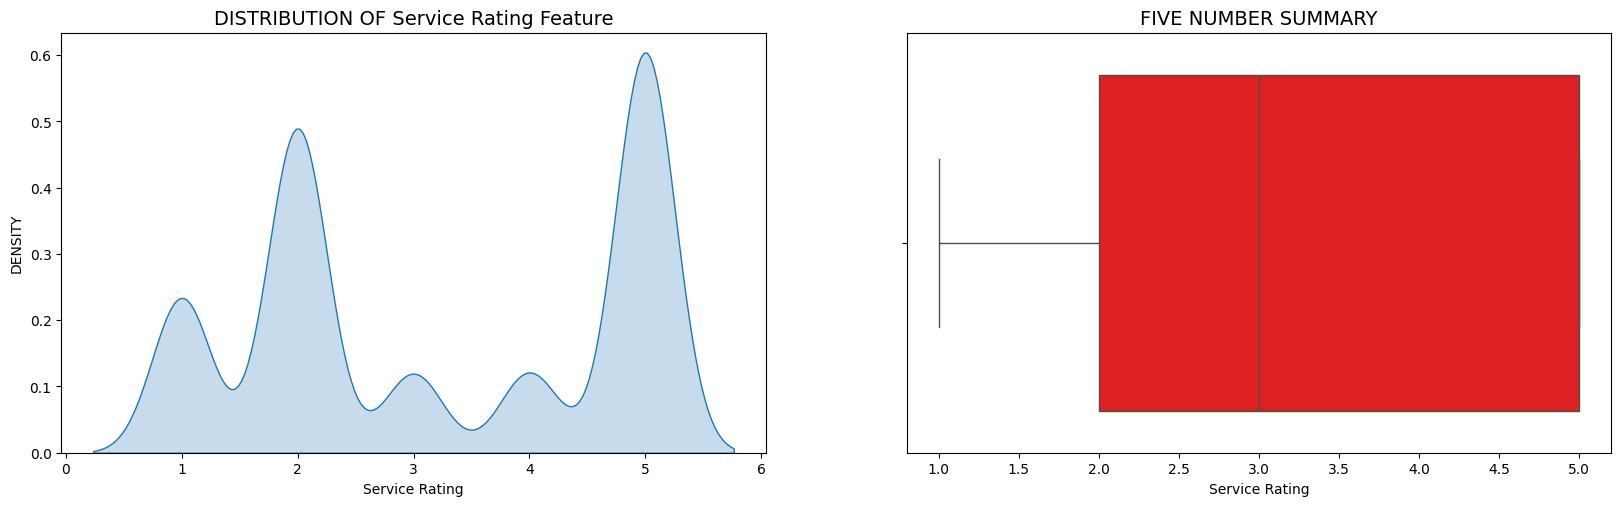

In [ ]:
# Analysing Service Rating	 feature

# Distribution plot and outlier plot
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz=sns.kdeplot(new_data,x=new_data['Service Rating'],fill=True)
#viz = sns.kdeplot(new_data['Service Rating'], color='c',kde=True)
viz.set_title('DISTRIBUTION OF Service Rating Feature',fontsize=14,color='black')
viz.set_ylabel('DENSITY',fontsize =10,color = 'black')
viz.set_xlabel('Service Rating',fontsize =10,color = 'black')

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(new_data['Service Rating'], orient='h',color='red',fliersize=2)
viz.set_title('FIVE NUMBER SUMMARY',fontsize=14,color='black')
viz.set_xlabel('Service Rating',fontsize =10,color = 'black')
plt.show()

In [ ]:
new_data['Service Rating'].value_counts()

,count
Service Rating,
5,3470
2,2811
1,1341
4,694
3,684


In [ ]:
#1.Finding out the unique product categories
new_data['Product Category'].unique()

array(['Fruits & Vegetables', 'Dairy', 'Beverages', 'Personal Care',
       'Grocery', 'Snacks'], dtype=object)

In [ ]:
# 2.Finding that how many total orders are there
new_data['Order ID'].nunique()

9000

In [ ]:
Percentage=new_data['Delivery Time (Minutes)'].mean()*100
Percentage

np.float64(2954.5)

In [ ]:
new_data[new_data['Delivery Delay']=='Yes'].count()

,0
Order ID,1276
Customer ID,1276
Platform,1276
Order Date & Time,1276
Delivery Time (Minutes),1276
Product Category,1276
Order Value (INR),1276
Customer Feedback,1276
Service Rating,1276
Delivery Delay,1276


In [ ]:
#Maximum Delivery Time
Maximum_delivery_time=new_data['Delivery Time (Minutes)'].max()
Maximum_delivery_time

65

In [ ]:
# 3. Average order value
Average_order_value=new_data['Order Value (INR)'].mean()
Average_order_value

np.float64(591.8742222222222)

In [ ]:
# 4. Orders with extremely high/low delivery times or order values
high_delivery_times=new_data[new_data['Delivery Time (Minutes)']==Maximum_delivery_time]
high_delivery_times

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
20106,ORD020107,CUST3940,JioMart,01:29.5,65,Snacks,450,Good quality products.,4,Yes,No


In [ ]:
Minimum_delivery_time=new_data['Delivery Time (Minutes)'].min()
Minimum_delivery_time

5

In [ ]:
low_delivery_times=new_data[new_data['Delivery Time (Minutes)']==Minimum_delivery_time]
low_delivery_times

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
87,ORD000088,CUST5339,Blinkit,05:29.5,5,Beverages,465,"Horrible experience, never ordering again.",1,No,Yes
101,ORD000102,CUST2796,JioMart,52:29.5,5,Personal Care,377,Items missing from order.,2,No,Yes
284,ORD000285,CUST2638,Blinkit,55:29.5,5,Grocery,505,"Fast delivery, great service!",5,No,No
378,ORD000379,CUST2137,Blinkit,25:29.5,5,Grocery,1296,Packaging could be better.,3,No,No
411,ORD000412,CUST6143,Swiggy Instamart,31:29.5,5,Snacks,104,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
25514,ORD025515,CUST6357,Swiggy Instamart,00:29.5,5,Dairy,291,Wrong item delivered.,1,No,Yes
28318,ORD028319,CUST2603,Swiggy Instamart,33:29.5,5,Personal Care,800,Quick and reliable!,5,No,No
29749,ORD029750,CUST5848,JioMart,21:29.5,5,Dairy,310,Excellent experience!,5,No,No
33166,ORD033167,CUST4561,Blinkit,34:29.5,5,Fruits & Vegetables,129,"Fast delivery, great service!",5,No,No


In [ ]:
#highest order values
highest_order_values=new_data[new_data['Order Value (INR)']==new_data['Order Value (INR)'].max()]
highest_order_values

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
2709,ORD002710,CUST6302,JioMart,50:29.5,18,Personal Care,2000,Items missing from order.,2,No,Yes


In [ ]:
#Lowest order values
Lowest_order_values=new_data[new_data['Order Value (INR)']==new_data['Order Value (INR)'].min()]
Lowest_order_values

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
14,ORD000015,CUST4811,Swiggy Instamart,27:29.5,33,Fruits & Vegetables,50,"Easy to order, loved it!",5,No,No
3596,ORD003597,CUST3954,Blinkit,02:29.5,32,Fruits & Vegetables,50,Delivery person was rude.,2,No,Yes


In [ ]:
#  Orders with lowest service ratings
Lowest_service_ratings=new_data[new_data['Service Rating']==new_data['Service Rating'].min()]
Lowest_service_ratings

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
7,ORD000008,CUST9935,Swiggy Instamart,50:29.5,16,Personal Care,195,"Horrible experience, never ordering again.",1,No,Yes
12,ORD000013,CUST2535,Blinkit,08:29.5,45,Fruits & Vegetables,516,"Horrible experience, never ordering again.",1,Yes,Yes
18,ORD000019,CUST9928,Swiggy Instamart,15:29.5,34,Dairy,417,"Horrible experience, never ordering again.",1,No,Yes
20,ORD000021,CUST4611,Blinkit,44:29.5,10,Beverages,789,Wrong item delivered.,1,No,Yes
27,ORD000028,CUST5552,JioMart,56:29.5,20,Dairy,334,Wrong item delivered.,1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
48480,ORD048481,CUST7758,JioMart,24:29.5,15,Dairy,152,"Horrible experience, never ordering again.",1,No,Yes
50241,ORD050242,CUST4092,Swiggy Instamart,37:29.5,24,Grocery,578,Wrong item delivered.,1,No,Yes
58370,ORD058371,CUST8943,Swiggy Instamart,30:29.5,35,Personal Care,1338,"Horrible experience, never ordering again.",1,No,Yes
70641,ORD070642,CUST1373,Blinkit,18:29.5,36,Snacks,138,"Horrible experience, never ordering again.",1,No,Yes


In [ ]:
Highest_service_ratings=new_data[new_data['Service Rating']==new_data['Service Rating'].max()]
Highest_service_ratings

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
6,ORD000007,CUST2679,JioMart,22:29.5,22,Personal Care,1693,"Fast delivery, great service!",5,No,No
8,ORD000009,CUST2424,JioMart,51:29.5,39,Fruits & Vegetables,182,Very satisfied with the service.,5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
56820,ORD056821,CUST3922,Swiggy Instamart,40:29.5,35,Grocery,340,Quick and reliable!,5,No,No
60468,ORD060469,CUST5517,Swiggy Instamart,32:29.5,27,Grocery,974,Very satisfied with the service.,5,No,No
62121,ORD062122,CUST2068,JioMart,15:29.5,25,Fruits & Vegetables,360,"Fast delivery, great service!",5,No,No
67051,ORD067052,CUST4230,Blinkit,40:29.5,30,Snacks,326,Quick and reliable!,5,No,No


In [ ]:
#Platform based questions
# 1. How many orders per platform?
No_of_orders_per_platform=new_data['Platform'].value_counts()
No_of_orders_per_platform

,count
Platform,
Blinkit,3060
JioMart,2978
Swiggy Instamart,2962


In [ ]:
# 2. Average delivery time for each platform
Average_delivery_time_per_platform=new_data.groupby('Platform')['Delivery Time (Minutes)'].mean()
Average_delivery_time_per_platform

,Delivery Time (Minutes)
Platform,
Blinkit,29.563072
JioMart,29.478845
Swiggy Instamart,29.592843


In [ ]:
#3.Average rating per platform
Average_rating_per_platform=new_data.groupby('Platform')['Service Rating'].mean()
Average_rating_per_platform

,Service Rating
Platform,
Blinkit,3.208824
JioMart,3.231363
Swiggy Instamart,3.274477


In [ ]:
# 4. Total revenue generated per platform
Total_Revenue_generated_per_platform=new_data.groupby('Platform')['Order Value (INR)'].sum()
Total_Revenue_generated_per_platform

,Order Value (INR)
Platform,
Blinkit,1819745
JioMart,1767693
Swiggy Instamart,1739430


In [ ]:
# 5. Number of refund requests per platform
No_of_requests_per_platform = new_data[new_data['Refund Requested'] == 'Yes'].groupby('Platform').size()
No_of_requests_per_platform

,0
Platform,
Blinkit,1436
JioMart,1375
Swiggy Instamart,1341


In [ ]:
# 6. Number of delivery delays per platform
No_of_delivery_delays_per_platform=new_data[new_data['Delivery Delay'] == 'Yes'].groupby('Platform').size()
No_of_delivery_delays_per_platform

,0
Platform,
Blinkit,404
JioMart,436
Swiggy Instamart,436


In [ ]:
#Product category Analysis
# 1. Which product categories are most ordered?
Product_most_ordered=new_data['Product Category'].value_counts()
Product_most_ordered

,count
Product Category,
Snacks,1530
Grocery,1528
Dairy,1513
Beverages,1507
Personal Care,1462
Fruits & Vegetables,1460


In [ ]:
# 2. Which categories have the highest average order value?
Highest_average_order_by_category =new_data.groupby('Product Category')['Order Value (INR)'].mean()
Highest_average_order_by_category

,Order Value (INR)
Product Category,
Beverages,551.375581
Dairy,455.567085
Fruits & Vegetables,371.483562
Grocery,858.522251
Personal Care,1050.226402
Snacks,272.583660


In [ ]:
# 3. What are the most delayed categories?
Most_delayed_categories=new_data[new_data['Delivery Delay'] == 'Yes'].groupby('Product Category').size()
Most_delayed_categories

,0
Product Category,
Beverages,191
Dairy,208
Fruits & Vegetables,231
Grocery,201
Personal Care,230
Snacks,215


In [ ]:
# 4. What is the average rating per category?
Average_rating_per_category=new_data.groupby('Product Category')['Service Rating'].mean()
Average_rating_per_category

,Service Rating
Product Category,
Beverages,3.258129
Dairy,3.245869
Fruits & Vegetables,3.258219
Grocery,3.202880
Personal Care,3.257866
Snacks,3.206536


In [ ]:
# 5. Which categories have most refund requests?
Most_refund_category=new_data[new_data['Refund Requested'] == 'Yes'].groupby('Product Category').size()
Most_refund_category

,0
Product Category,
Beverages,681
Dairy,690
Fruits & Vegetables,672
Grocery,727
Personal Care,658
Snacks,724


In [ ]:
#Delivery Time and Delay Insights
# 1. What is the overall distribution of delivery time?
Overall_delivery_time=new_data['Delivery Time (Minutes)'].describe()
Overall_delivery_time

,Delivery Time (Minutes)
count,9000.000000
mean,29.545000
std,10.034244
min,5.000000
25%,23.000000
50%,30.000000
75%,36.000000
max,65.000000


In [ ]:
# 2. Are there outliers in delivery time? (Using IQR method)
def get_outliers(col):
    q1=new_data[col].quantile(0.25)
    q3=new_data[col].quantile(0.75)
    iqr=q3-q1
    upper_outliers=[val for val in new_data[col].values if val > q3 + (1.5*iqr)]
    lower_outliers=[val for val in new_data[col].values if val < q1 - (1.5*iqr)]
    return upper_outliers,lower_outliers
upper_outliers,lower_outliers=get_outliers('Delivery Time (Minutes)')
upper_outliers,lower_outliers

([np.int64(60),
  np.int64(61),
  np.int64(57),
  np.int64(58),
  np.int64(59),
  np.int64(59),
  np.int64(61),
  np.int64(56),
  np.int64(60),
  np.int64(57),
  np.int64(58),
  np.int64(60),
  np.int64(59),
  np.int64(56),
  np.int64(58),
  np.int64(59),
  np.int64(57),
  np.int64(56),
  np.int64(56),
  np.int64(57),
  np.int64(64),
  np.int64(56),
  np.int64(56),
  np.int64(57),
  np.int64(62),
  np.int64(57),
  np.int64(62),
  np.int64(57),
  np.int64(62),
  np.int64(59),
  np.int64(59),
  np.int64(56),
  np.int64(56),
  np.int64(57),
  np.int64(56),
  np.int64(56),
  np.int64(56),
  np.int64(58),
  np.int64(56),
  np.int64(57),
  np.int64(60),
  np.int64(56),
  np.int64(59),
  np.int64(56),
  np.int64(56),
  np.int64(65),
  np.int64(57),
  np.int64(61),
  np.int64(58),
  np.int64(58)],
 [])

In [ ]:
new_data['Delivery Time (Minutes)'].values

array([30, 16, 25, ..., 20, 17, 32])

In [ ]:
new_data['Delivery Time (Minutes)'].tail()

,Delivery Time (Minutes)
67051,30
70641,36
70768,20
74929,17
83875,32


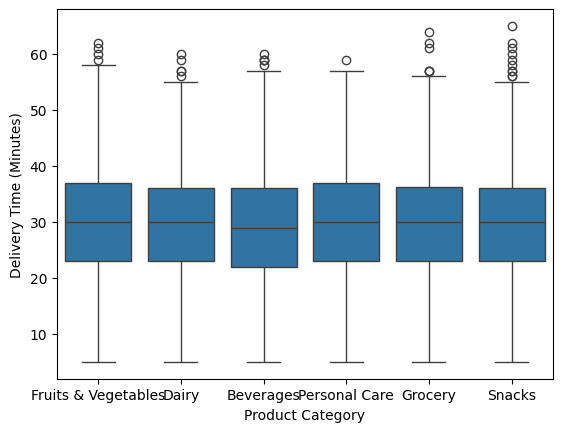

In [ ]:
sns.boxplot(x=new_data['Product Category'], y=new_data['Delivery Time (Minutes)'])
plt.show()

In [ ]:
# 3. What is the frequency of delivery delays?
delivery_delay_frequency=new_data['Delivery Delay'].value_counts()
delivery_delay_frequency

,count
Delivery Delay,
No,7724
Yes,1276


In [ ]:
# 4. Is there a relationship between delivery delay and rating?
Average_rating_with_delay=new_data.groupby('Delivery Delay')['Service Rating'].mean()
Average_rating_with_delay

,Service Rating
Delivery Delay,
No,3.232393
Yes,3.271160


In [ ]:
#Customer Feedback & Ratings
# 1. What is the average customer rating?
Average_customer_rating=new_data['Service Rating'].mean()
Average_customer_rating

np.float64(3.237888888888889)

In [ ]:
#Products with More Positive or Negative Feedback
feedback_df=new_data.dropna(subset=['Customer Feedback'])
feedback_df

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
67051,ORD067052,CUST4230,Blinkit,40:29.5,30,Snacks,326,Quick and reliable!,5,No,No
70641,ORD070642,CUST1373,Blinkit,18:29.5,36,Snacks,138,"Horrible experience, never ordering again.",1,No,Yes
70768,ORD070769,CUST9546,Blinkit,27:29.5,20,Dairy,113,Quick and reliable!,5,No,No
74929,ORD074930,CUST5048,Blinkit,30:29.5,17,Personal Care,1217,"Very late delivery, not happy.",2,No,Yes


In [ ]:
# Negative feedback: Rating 1 or 2
Negative_feedback=feedback_df[feedback_df['Service Rating']<=2]
Negative_feedback

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
5,ORD000006,CUST3286,Blinkit,36:29.5,25,Personal Care,1939,Items missing from order.,2,No,Yes
7,ORD000008,CUST9935,Swiggy Instamart,50:29.5,16,Personal Care,195,"Horrible experience, never ordering again.",1,No,Yes
9,ORD000010,CUST7912,JioMart,08:29.5,51,Grocery,1279,"Very late delivery, not happy.",2,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
61532,ORD061533,CUST3640,Swiggy Instamart,58:29.5,38,Personal Care,912,"Very late delivery, not happy.",2,No,Yes
62242,ORD062243,CUST8013,JioMart,14:29.5,13,Dairy,691,Items missing from order.,2,No,Yes
70641,ORD070642,CUST1373,Blinkit,18:29.5,36,Snacks,138,"Horrible experience, never ordering again.",1,No,Yes
74929,ORD074930,CUST5048,Blinkit,30:29.5,17,Personal Care,1217,"Very late delivery, not happy.",2,No,Yes


In [ ]:
# Positive feedback: Rating 4 or 5
Positive_feedback=feedback_df[feedback_df['Service Rating']>=4]
Positive_feedback

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
6,ORD000007,CUST2679,JioMart,22:29.5,22,Personal Care,1693,"Fast delivery, great service!",5,No,No
8,ORD000009,CUST2424,JioMart,51:29.5,39,Fruits & Vegetables,182,Very satisfied with the service.,5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
56820,ORD056821,CUST3922,Swiggy Instamart,40:29.5,35,Grocery,340,Quick and reliable!,5,No,No
60468,ORD060469,CUST5517,Swiggy Instamart,32:29.5,27,Grocery,974,Very satisfied with the service.,5,No,No
62121,ORD062122,CUST2068,JioMart,15:29.5,25,Fruits & Vegetables,360,"Fast delivery, great service!",5,No,No
67051,ORD067052,CUST4230,Blinkit,40:29.5,30,Snacks,326,Quick and reliable!,5,No,No


In [ ]:
# Count of negative feedback per product category
negative_feedback_product=Negative_feedback['Product Category'].value_counts()
negative_feedback_product

,count
Product Category,
Grocery,727
Snacks,724
Dairy,690
Beverages,681
Fruits & Vegetables,672
Personal Care,658


In [ ]:
# Count of positive feedback per product category
positive_feedback_product=Positive_feedback['Product Category'].value_counts()
positive_feedback_product

,count
Product Category,
Beverages,720
Dairy,708
Snacks,691
Personal Care,687
Grocery,682
Fruits & Vegetables,676


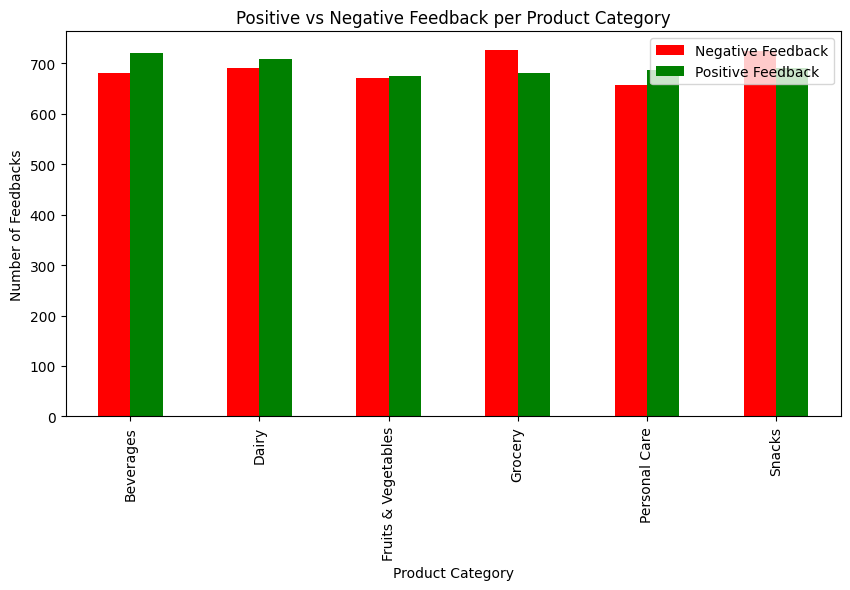

In [ ]:
 #Positive vs Negative Feedback
import matplotlib.pyplot as plt
feedback_comparison=pd.DataFrame({
    'Negative Feedback': negative_feedback_product,
    'Positive Feedback': positive_feedback_product
}).fillna(0)
feedback_comparison.plot(kind='bar', figsize=(10,5), color=['RED', 'Green'])
plt.title('Positive vs Negative Feedback per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Feedbacks')
plt.show()

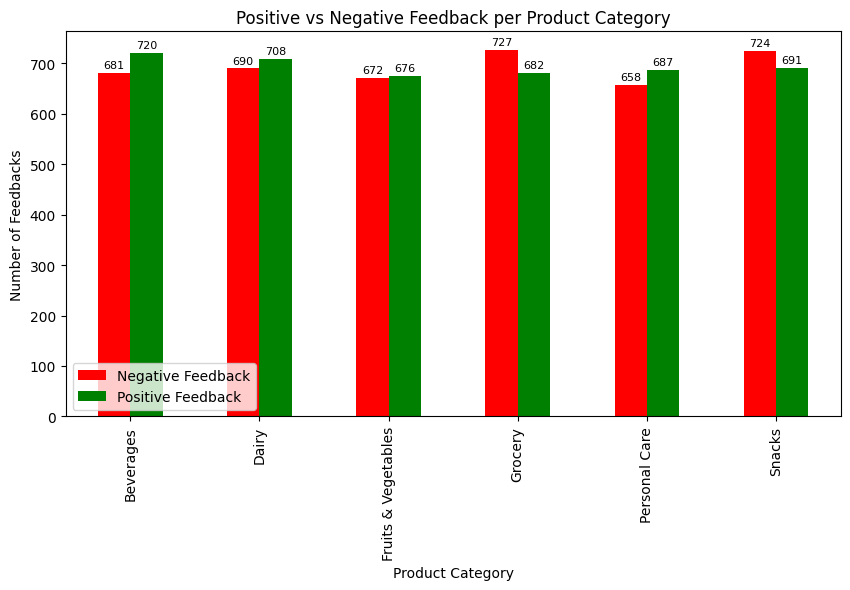

In [ ]:
import matplotlib.pyplot as plt

feedback_comparison = pd.DataFrame({
    'Negative Feedback': negative_feedback_product,
    'Positive Feedback': positive_feedback_product
}).fillna(0)

# Create the bar chart
ax = feedback_comparison.plot(kind='bar', figsize=(10,5), color=['red', 'green'])

# Add title and labels
plt.title('Positive vs Negative Feedback per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Feedbacks')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, padding=2)

plt.show()


**In this project, I have done Basic Exploratory Data Analysis (EDA) on E-commerce Delivery Analytics.**


Project Done By,


*S.SUGUNA ME.*